In [9]:
path="E:\\datasets\\hyperspectral\\"



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [11]:
data="PostImg_2007.mat"
multi_class="Reference_Map_Multiclass.mat"

In [12]:
import scipy.io as sio

# Dosya yollarınızı doğru şekilde belirtin
data_path = path+data
multi_class_path = path+multi_class

# .mat dosyalarını okuma
data = sio.loadmat(data_path)
multi_class = sio.loadmat(multi_class_path)

# Verinin anahtarlarını (içeriklerini) kontrol etme
print(data.keys())
print(multi_class.keys())

# 


dict_keys(['__header__', '__version__', '__globals__', 'img_2007'])
dict_keys(['__header__', '__version__', '__globals__', 'Ref_map_multiclass'])


In [27]:
img=data["img_2007"]
muti=multi_class["Ref_map_multiclass"]

In [16]:
img.shape


(225, 180, 159)

In [28]:
muti.shape

(225, 180)

In [31]:
np.unique(muti)

array([1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [17]:
img.shape

(225, 180, 159)

(225, 180)

In [42]:
img.shape

(225, 180, 159)

# sadece birinci spektrali görüntüleyelim 

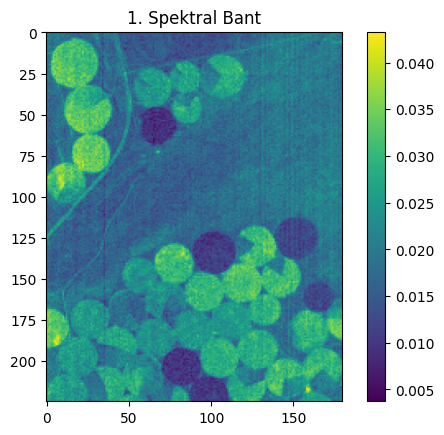

In [164]:

first_spectral_band = img[:, :,0 ]  # 0, Python'da ilk indeks

# 1. spektral bandı görüntüle
plt.imshow(first_spectral_band,)
plt.title('1. Spektral Bant')
plt.colorbar()
plt.show()


istediğimiz kanalları 3 kanallı şekilde görüntüleyebiliriz,
cmap='gray' ifadesi olmadığı zaman:
NOT:
2D veriler için matplotlib başka bir renk haritası kullanır (renkli görünür).
3D RGB veriler için matplotlib bu veriyi zaten renkli olarak gösterir. 

(225, 180)
(225, 180)
(225, 180)


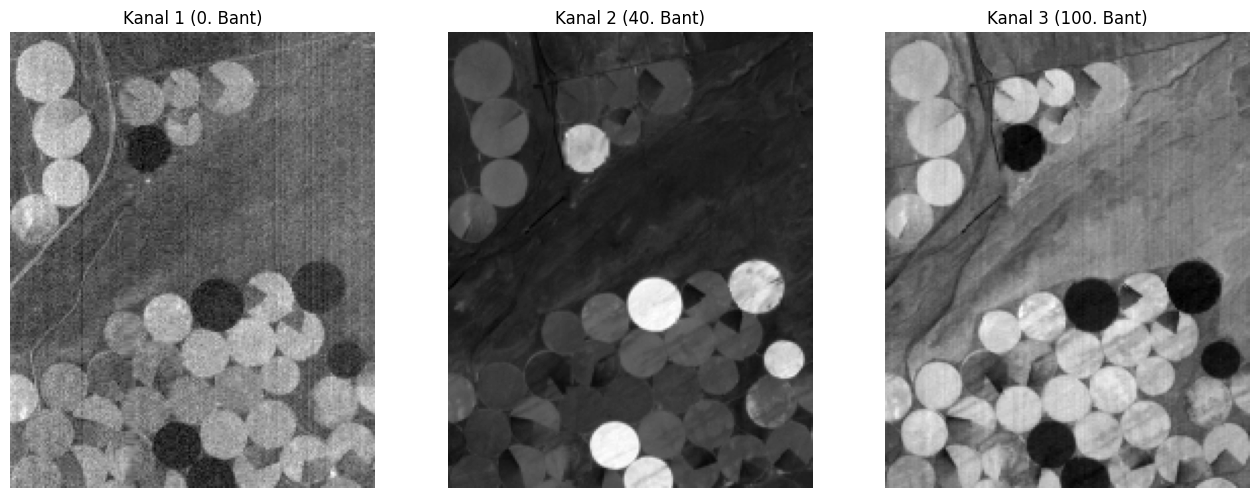

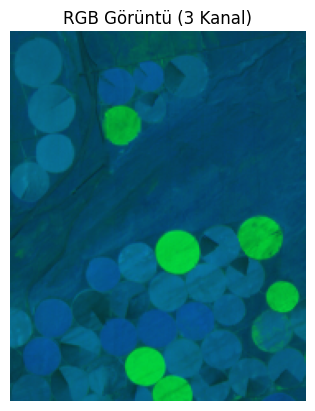

(225, 180, 3)


In [170]:
import numpy as np
import matplotlib.pyplot as plt
 
channel_1 = img[:, :, 0]     # 1. kanal (0. spektral bant)
channel_2 = img[:, :, 40]    # 2. kanal (40. spektral bant)
channel_3 = img[:, :,100]   # 3. kanal (100. spektral bant)

 
print(channel_1.shape)
print(channel_2.shape)
print(channel_3.shape)
image_three_channel = np.stack((channel_1, channel_2, channel_3), axis=-1)

plt.figure(figsize=(16, 8))


plt.subplot(1, 3, 1)
plt.imshow(channel_1, cmap='gray')
plt.title('Kanal 1 (0. Bant)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(channel_2, cmap='gray')
plt.title('Kanal 2 (40. Bant)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(channel_3, cmap='gray')
plt.title('Kanal 3 (100. Bant)')
plt.axis('off')

plt.show()

# RGB görüntüsünü oluştur ve çizdir
plt.imshow(image_three_channel)
plt.title('RGB Görüntü (3 Kanal)')
plt.axis('off')
plt.show()

print(image_three_channel.shape)


(225, 180)

# PRINCIPLE COMPONENT ANALYSIS 

In [57]:
from sklearn.decomposition import PCA

In [71]:
img.shape

(225, 180, 159)

In [72]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1],-1)  #  iki boyutlu hale getiriyoruz .

In [75]:

pca = PCA(n_components=159)  
principal_components = pca.fit_transform(reshaped_img)


[5.55183101e-01 4.08273063e-01 2.12540458e-02 2.05074181e-03
 1.36297172e-03 1.09319341e-03 7.58532345e-04 6.64544951e-04
 4.41715671e-04 4.30547360e-04 4.10976940e-04 3.75462302e-04
 3.46632366e-04 3.38781034e-04 3.28730011e-04 2.99196274e-04
 2.83400204e-04 2.46197405e-04 2.30814919e-04 1.84651777e-04
 1.79967452e-04 1.75288231e-04 1.70718715e-04 1.61343335e-04
 1.52870037e-04 1.45828278e-04 1.34652452e-04 1.29697194e-04
 1.27298605e-04 1.26274876e-04 1.22227471e-04 1.19134474e-04
 1.13511987e-04 1.08098668e-04 1.05365001e-04 1.00877014e-04
 9.83429166e-05 9.56405545e-05 9.35708241e-05 8.71682134e-05
 8.55360713e-05 8.41034791e-05 8.21932534e-05 7.98441868e-05
 7.93187830e-05 7.72664325e-05 7.41390489e-05 7.34250499e-05
 6.97540501e-05 6.79559719e-05 6.72618536e-05 6.57167280e-05
 6.53470799e-05 6.21104866e-05 6.03721457e-05 5.91304276e-05
 5.84278504e-05 5.70018989e-05 5.65088648e-05 5.40679080e-05
 5.13900110e-05 4.93088390e-05 4.51689250e-05 4.28205030e-05
 4.13334494e-05 4.080890

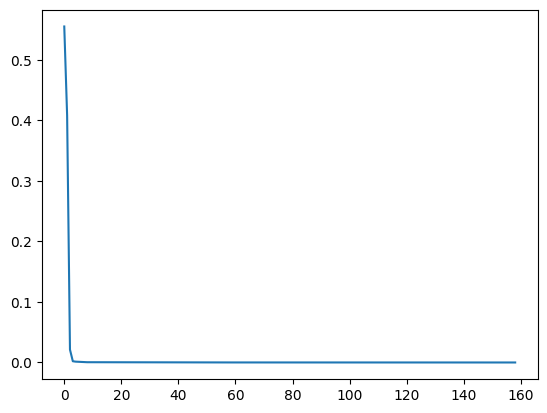

In [74]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(np.sum(explained_variance))
plt.plot(explained_variance)

10 tane spektral almak yeterli gözüküyor .

In [78]:
pca = PCA(n_components=10)  
principal_components = pca.fit_transform(reshaped_img)

In [107]:
principal_components.shape

(40500, 10)

In [110]:
reshape_image_pca=principal_components.reshape(img.shape[0],img.shape[1],10)

In [112]:
reshape_image_pca.shape

(225, 180, 10)

In [113]:
(h,w,c) = reshape_image_pca.shape

# K MEANS İLE KÜMELEME 

In [84]:
imag_2_segmentation=reshape_image_pca.reshape(h*w,c)

In [85]:
from sklearn.cluster import KMeans

# 7 küme olduğunu ground truth dan biliyoruz 

In [124]:
model = KMeans(n_clusters=7,n_init=1000,algorithm="lloyd")# 35iterasyon ,17 cluster.

In [125]:
labels = model.fit_predict(imag_2_segmentation)

In [132]:
print(np.unique(labels))
labels.shape

[0 1 2 3 4 5 6]


(40500,)

In [133]:
model.cluster_centers_.shape

(7, 10)

In [134]:
model.cluster_centers_

array([[ 9.07305994e-01,  8.25348796e-01,  1.36479030e-01,
         2.63764901e-02,  9.08723060e-03, -9.62622939e-04,
         2.41981311e-03, -5.94923582e-03, -9.55546803e-04,
         8.33914939e-03],
       [-2.65768931e-01, -4.98367286e-01, -3.02369851e-02,
         8.81714863e-03, -3.59237196e-04, -7.67763967e-04,
         1.09672538e-03,  9.78025121e-04,  1.78566657e-03,
         3.95890635e-03],
       [ 5.28172772e-01,  3.59105675e-01,  1.15185212e-01,
         1.35171236e-03, -7.02942859e-03,  7.23832224e-03,
        -6.70531745e-04,  1.09899182e-02,  1.42912335e-03,
         1.67498356e-03],
       [-2.19494693e+00,  1.50619873e+00, -2.75033485e-02,
        -2.36647012e-02,  1.81028797e-03,  2.68129223e-03,
        -7.05396976e-04, -2.22274883e-03, -1.12089983e-03,
        -5.33476006e-03],
       [ 1.07715045e+00,  4.68824304e-01, -2.13505324e-01,
        -6.87316859e-02, -3.18361750e-03,  5.35495048e-03,
         7.16414115e-04,  7.63970494e-03, -2.61106186e-04,
        -1.

In [135]:
cluster_imag=np.reshape(labels,(h,w))

In [136]:
cluster_imag.shape

(225, 180)

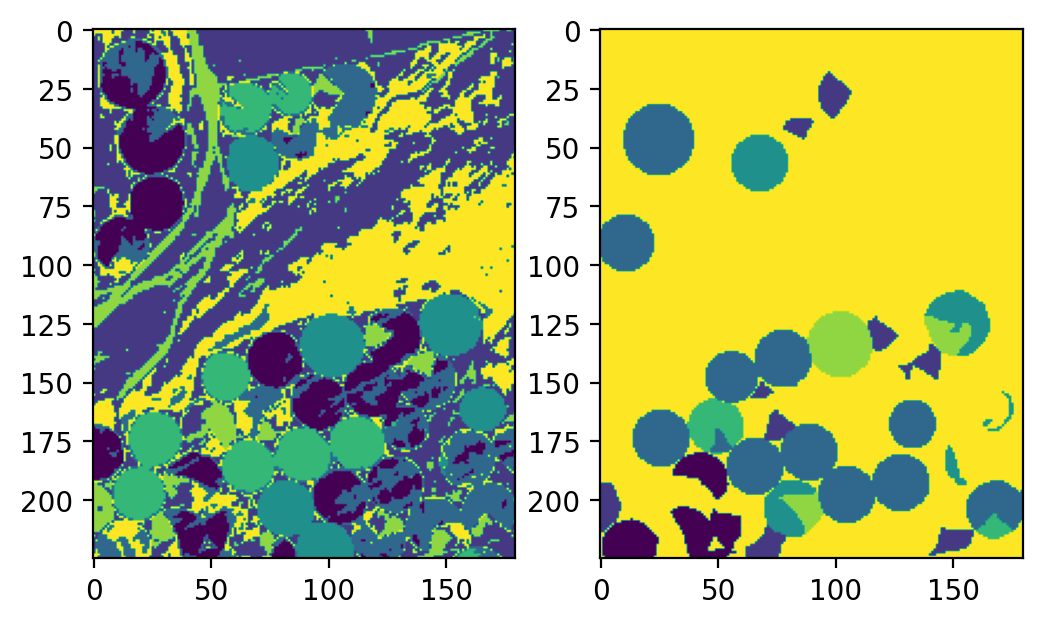

In [137]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(cluster_imag)
plt.subplot(1,2,2)
plt.imshow(muti)

In [138]:
reshape_image_pca.shape

(225, 180, 10)

In [140]:
num_classes=7

# Gaussian Mixture Models (GMM)

GMM, verinin birden fazla normal dağılım tarafından oluşturulduğunu varsayar. Bu, her pikselin farklı sınıflar için olasılıklarını tahmin ederek segmentasyon sağlar.

In [141]:
from sklearn.mixture import GaussianMixture

 
gmm = GaussianMixture(n_components=num_classes, random_state=42)
gmm.fit(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]))

segmented_image = gmm.predict(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]))
segmented_image_gaussian = segmented_image.reshape(reshape_image_pca.shape[:2])


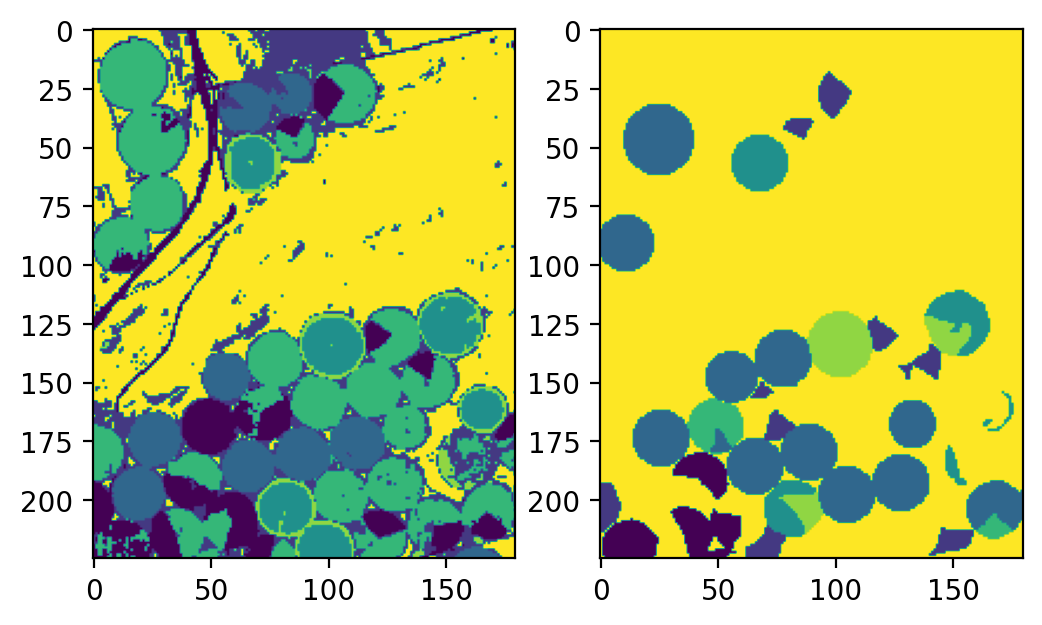

In [142]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(segmented_image)
plt.subplot(1,2,2)
plt.imshow(muti)

In [ ]:
reshape_image_pca

#  Spectral clustering 
Spektral kümeleme, veriyi bir benzerlik matrisine dayalı olarak kümeler. Genellikle büyük veriler için daha iyi performans gösterir.

In [146]:
from sklearn.cluster import SpectralClustering

spectral_model = SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors', random_state=42)
segmented_image = spectral_model.fit_predict(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]))
segmented_image_spectral = segmented_image.reshape(reshape_image_pca.shape[:2])


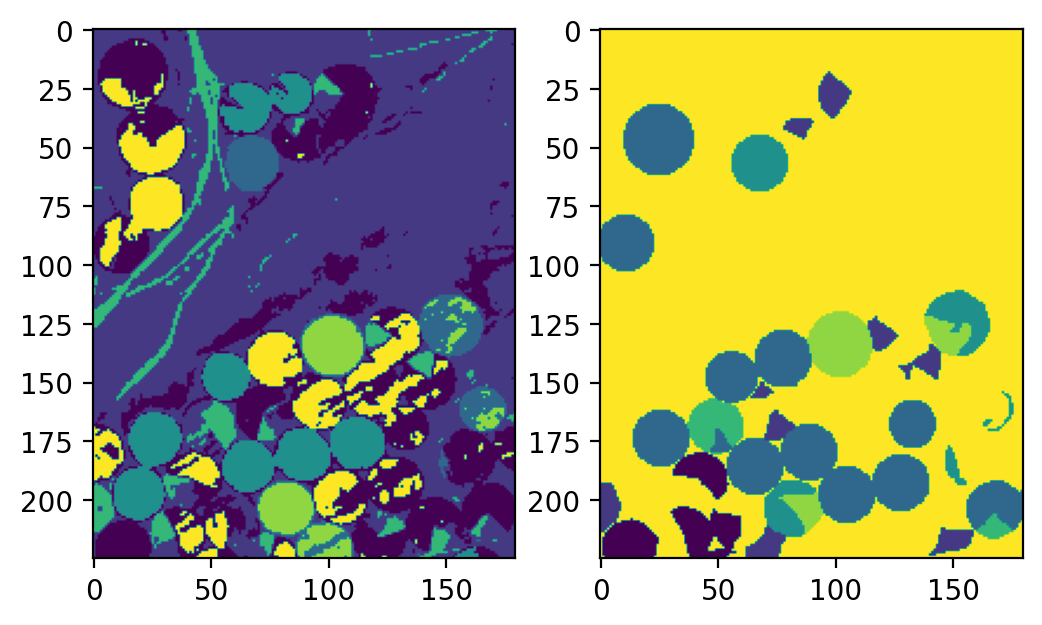

In [147]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(segmented_image_spectral)
plt.subplot(1,2,2)
plt.imshow(muti)

# Mean Shift
Mean Shift, verilerin yoğunluk merkezlerini bulmayı hedefler. Küme merkezine yakın olan verileri bir araya getirerek segmentasyon yapar.

In [148]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Bandwidth'i otomatik olarak tahmin et
bandwidth = estimate_bandwidth(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]), quantile=0.2, n_samples=500)

# Mean Shift modelini oluştur     
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
segmented_image = mean_shift.fit_predict(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]))
segmented_image_mean_shift = segmented_image.reshape(reshape_image_pca.shape[:2])


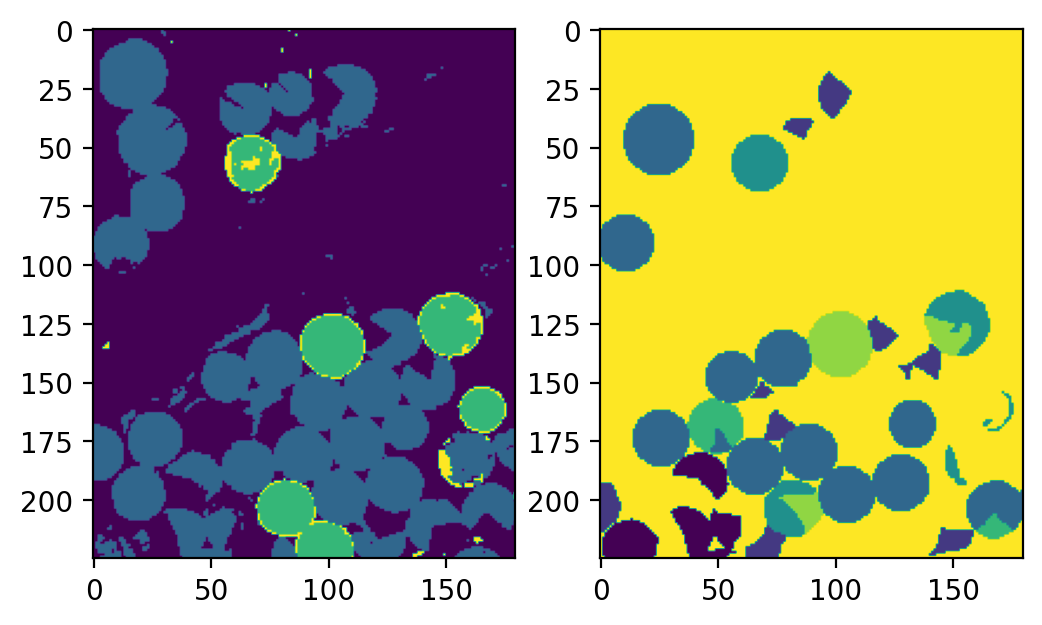

In [149]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(segmented_image_mean_shift)
plt.subplot(1,2,2)
plt.imshow(muti)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN, yoğunluğa dayalı bir kümeleme algoritmasıdır. Gürültü ve yoğun kümeleri belirlemek için kullanılır.

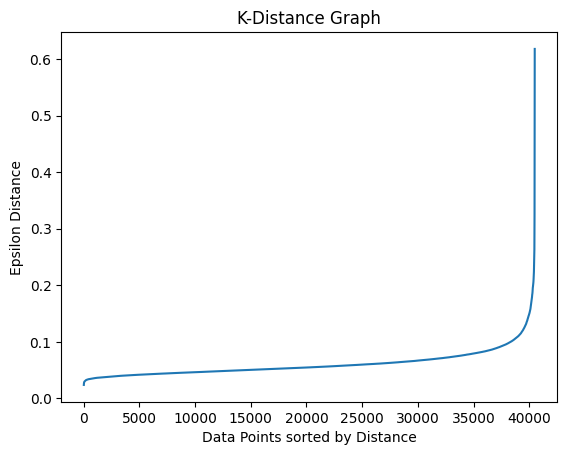

In [156]:
from sklearn.neighbors import NearestNeighbors

reshaped_data = reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1])

# K-en yakın komşular analizi knn
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(reshaped_data)
distances, indices = neighbors_fit.kneighbors(reshaped_data)


distances = np.sort(distances[:, -1]) # en uzak komşu mesafeler i


plt.plot(distances)
plt.title("K-Distance Graph")
plt.ylabel("Epsilon Distance")
plt.xlabel("Data Points sorted by Distance")
plt.show()
# eğimin birden yükseldiği yer uygun eps değeri 


In [159]:
from sklearn.cluster import DBSCAN

resreshape_image_pca =reshape_image_pca.astype('float16') # data boyutunu azaltması için 

reshaped_data = reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1])

dbscan = DBSCAN(eps=40000, min_samples=5)
segmented_image = dbscan.fit_predict(reshaped_data)

segmented_image_dbs = segmented_image.reshape(reshape_image_pca.shape[:2])

import matplotlib.pyplot as plt
plt.imshow(segmented_image)
plt.title('DBSCAN Segmentasyonu')
plt.axis('off')
plt.show()


MemoryError: 

# Fuzzy C-Means
Fuzzy C-means, her bir pikselin birden fazla sınıfa ait olabileceği bir kümeleme yöntemidir.

In [154]:
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(reshape_image_pca.reshape(-1, reshape_image_pca.shape[-1]).T, c=num_classes, m=2, error=0.005, maxiter=1000, init=None)
segmented_image = np.argmax(u, axis=0)
segmented_image_fuzzy = segmented_image.reshape(reshape_image_pca.shape[:2])


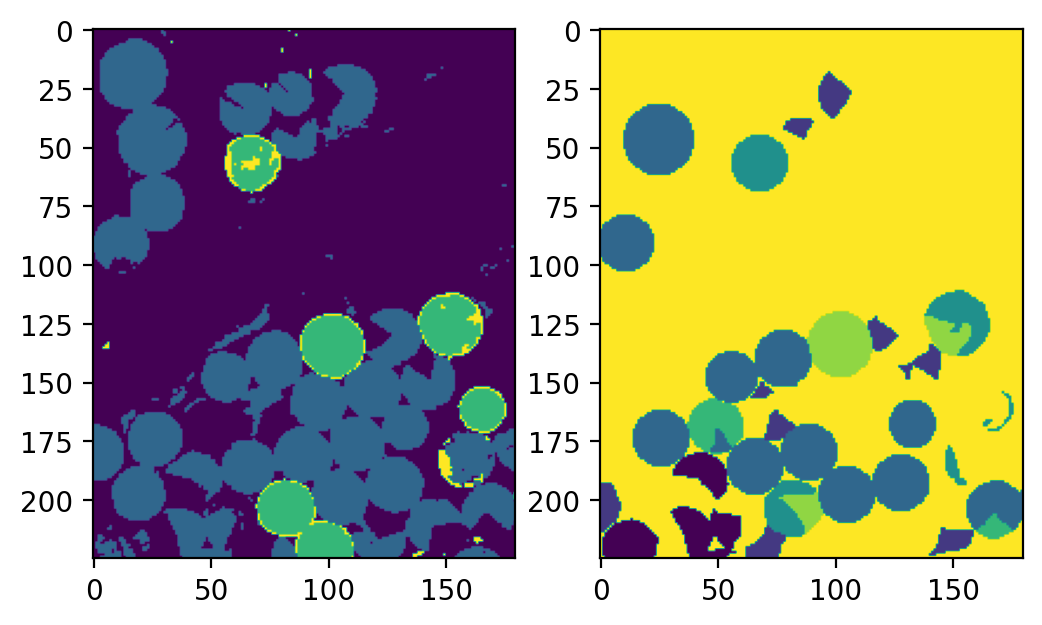

In [155]:
plt.figure(figsize=(6,6),dpi=200)
plt.subplot(1,2,1)
plt.imshow(segmented_image_mean_shift)
plt.subplot(1,2,2)
plt.imshow(muti)

In [ ]:
#

In [ ]:
#

In [ ]:
#